In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Clustering Analysis on the risk-level-increased data

In [2]:
df_feature = pd.read_csv('data/feature_extraction_15x15.csv')
riskforecasting = pd.read_csv('data/pollution_risk_forecasting.csv')
df_merged_15x15 = pd.merge(df_feature, riskforecasting[['site', 'time', 'riskLevelLabel']], on=['site', 'time'])
df_merged_15mean_raw = df_merged_15x15[df_merged_15x15['riskLevelLabel'] == 1]
X_15mean_raw = df_merged_15mean_raw.iloc[:, 176:182]
X_15mean_raw.dropna(inplace=True)
X_15mean_raw

,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean
392,0.015408,0.249985,3.531315,0.207090,3.572845,3.914695
813,0.007234,0.101324,3.442246,0.238778,3.510525,5.191815
1234,0.006205,0.091121,1.927018,0.146031,5.145323,2.167765
9275,0.002986,0.039705,1.283574,0.142911,5.236460,2.083618
9276,0.002987,0.039723,1.295786,0.141153,5.311809,2.040467
...,...,...,...,...,...,...
186609,0.005212,0.052180,0.810492,0.116814,7.345041,1.534649
186610,0.007043,0.022616,1.744973,0.100035,8.203893,1.141540
186617,0.007291,0.022990,1.804538,0.117367,6.822875,1.508444
186619,0.007469,0.024174,1.846479,0.124488,6.441228,1.682777


In [3]:
X_15mean_raw_all_withNaN = df_merged_15x15.iloc[:, list(range(176, 182)) + [-1]]
X_15mean_raw_all = X_15mean_raw_all_withNaN.dropna()
X_15mean_all_scaled = X_15mean_raw_all.copy()
std = StandardScaler()
X_15mean_all_scaled.iloc[:, :-1] = std.fit_transform(X_15mean_all_scaled.iloc[:, :-1])
X_15mean_scaled = X_15mean_all_scaled[X_15mean_all_scaled['riskLevelLabel']==1]
X_15mean_scaled = X_15mean_scaled.iloc[:, :-1]
X_15mean_scaled

,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean
392,-0.252293,0.466512,-0.284107,-0.003264,-0.421046,-0.106523
813,-0.650901,-0.570949,-0.291353,0.311054,-0.446833,0.231487
1234,-0.701101,-0.642153,-0.414618,-0.608924,0.229632,-0.568875
9275,-0.858046,-1.000970,-0.466963,-0.639879,0.267343,-0.591146
9276,-0.858018,-1.000843,-0.465970,-0.657309,0.298522,-0.602567
...,...,...,...,...,...,...
186609,-0.749494,-0.913914,-0.505449,-0.898742,1.139856,-0.736440
186610,-0.660235,-1.120227,-0.429428,-1.065177,1.495242,-0.840482
186617,-0.648133,-1.117617,-0.424582,-0.893255,0.923789,-0.743375
186619,-0.639454,-1.109356,-0.421170,-0.822615,0.765866,-0.697235


In [4]:
within_cluster_distance = []
silhouette_scores = {}
for cluster_number in range(2,15):
    kmeans = KMeans(n_clusters=cluster_number, max_iter=1000, n_init=50, random_state=100)
    kmeans.fit(X_15mean_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_15mean_scaled, labels)
    silhouette_scores[cluster_number] = score
    print("For {0} clusters, silhouette score is {1}".format(cluster_number, score))
    within_cluster_distance.append(kmeans.inertia_)
        
best_cluster_number = max(silhouette_scores, key=silhouette_scores.get)
print()
print(f'Consider K-means clustering with K = {best_cluster_number}')

For 2 clusters, silhouette score is 0.4340819064458743
For 3 clusters, silhouette score is 0.3579004262373283
For 4 clusters, silhouette score is 0.35774219378912486
For 5 clusters, silhouette score is 0.36077255758369214
For 6 clusters, silhouette score is 0.3611643308580316
For 7 clusters, silhouette score is 0.3384776352088845
For 8 clusters, silhouette score is 0.33578637867836736
For 9 clusters, silhouette score is 0.3389307180842693
For 10 clusters, silhouette score is 0.3400202452114565
For 11 clusters, silhouette score is 0.29916152149793745
For 12 clusters, silhouette score is 0.30088971290475586
For 13 clusters, silhouette score is 0.2895247255484802
For 14 clusters, silhouette score is 0.27816023819862423

Consider K-means clustering with K = 2


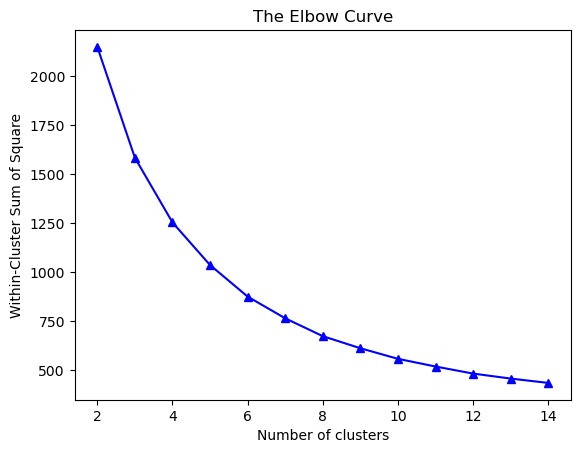

In [51]:
#Draw the Elbow curve
plt.plot(range(2,15),total_distance,'b^-')
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.savefig('results/Kmeans/K_Elbow.png')
plt.show()

In [5]:
#Fit the model with 2 clusters
kmeans = KMeans(n_clusters=2, max_iter=1000, n_init=50, random_state=100)
kmeans.fit(X_15mean_scaled)
X_15mean_scaled['cluster'] = kmeans.labels_ + 1
X_15mean_raw['cluster'] = kmeans.labels_ + 1
X_15mean_raw

,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean,cluster
392,0.015408,0.249985,3.531315,0.207090,3.572845,3.914695,2
813,0.007234,0.101324,3.442246,0.238778,3.510525,5.191815,2
1234,0.006205,0.091121,1.927018,0.146031,5.145323,2.167765,2
9275,0.002986,0.039705,1.283574,0.142911,5.236460,2.083618,2
9276,0.002987,0.039723,1.295786,0.141153,5.311809,2.040467,2
...,...,...,...,...,...,...,...
186609,0.005212,0.052180,0.810492,0.116814,7.345041,1.534649,2
186610,0.007043,0.022616,1.744973,0.100035,8.203893,1.141540,2
186617,0.007291,0.022990,1.804538,0.117367,6.822875,1.508444,2
186619,0.007469,0.024174,1.846479,0.124488,6.441228,1.682777,2


In [6]:
X_15mean_raw["cluster"].value_counts()

2    386
1    202
Name: cluster, dtype: int64

In [7]:
pca = PCA(2)
X_15mean_scaled_2d = pd.DataFrame(pca.fit_transform(X_15mean_scaled),columns = ['PC1','PC2'])
X_15mean_scaled_2d['cluster'] = kmeans.labels_ + 1
X_15mean_scaled_2d

,PC1,PC2,cluster
0,-0.332015,0.821796,2
1,-0.630077,1.036314,2
2,-1.603890,0.197508,2
3,-1.855189,0.182686,2
4,-1.877147,0.159710,2
...,...,...,...
583,-2.291510,-0.283239,2
584,-2.524151,-0.636771,2
585,-2.192589,-0.336612,2
586,-2.080407,-0.238612,2


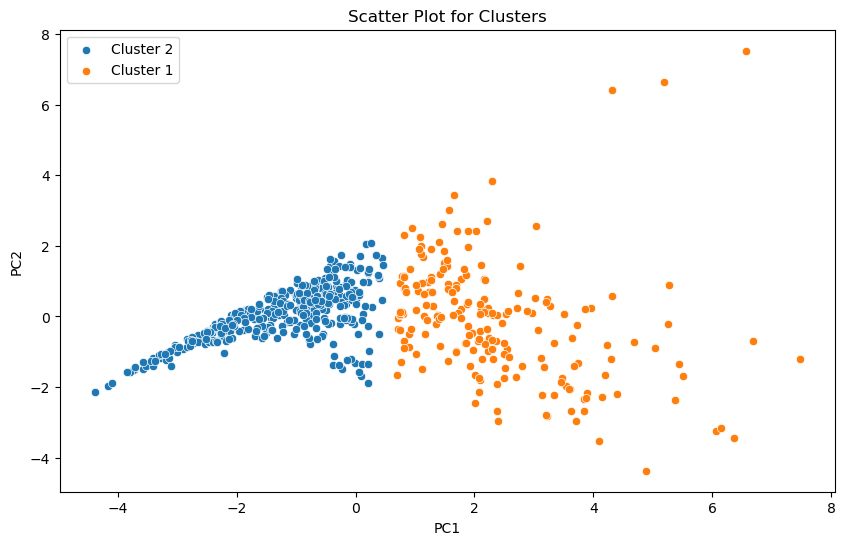

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
clusters = X_15mean_scaled_2d['cluster'].unique()
for cluster in clusters:
    data = X_15mean_scaled_2d[X_15mean_scaled_2d['cluster'] == cluster]
    sns.scatterplot(x='PC1', y='PC2', data=data, label=f'Cluster {cluster}')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot for Clusters')
plt.savefig('results/Kmeans/K_scatter.png')
plt.show()

In [58]:
means_cluster = X_15mean_raw.groupby('cluster').mean()
means_cluster_scaled = (means_cluster - std.mean_) / std.scale_
means_cluster_scaled

,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean
cluster,,,,,,
1,1.292586,0.805086,1.625055,0.846163,-0.832117,0.701089
2,-0.269182,-0.462557,-0.254463,-0.450938,0.363341,-0.419941


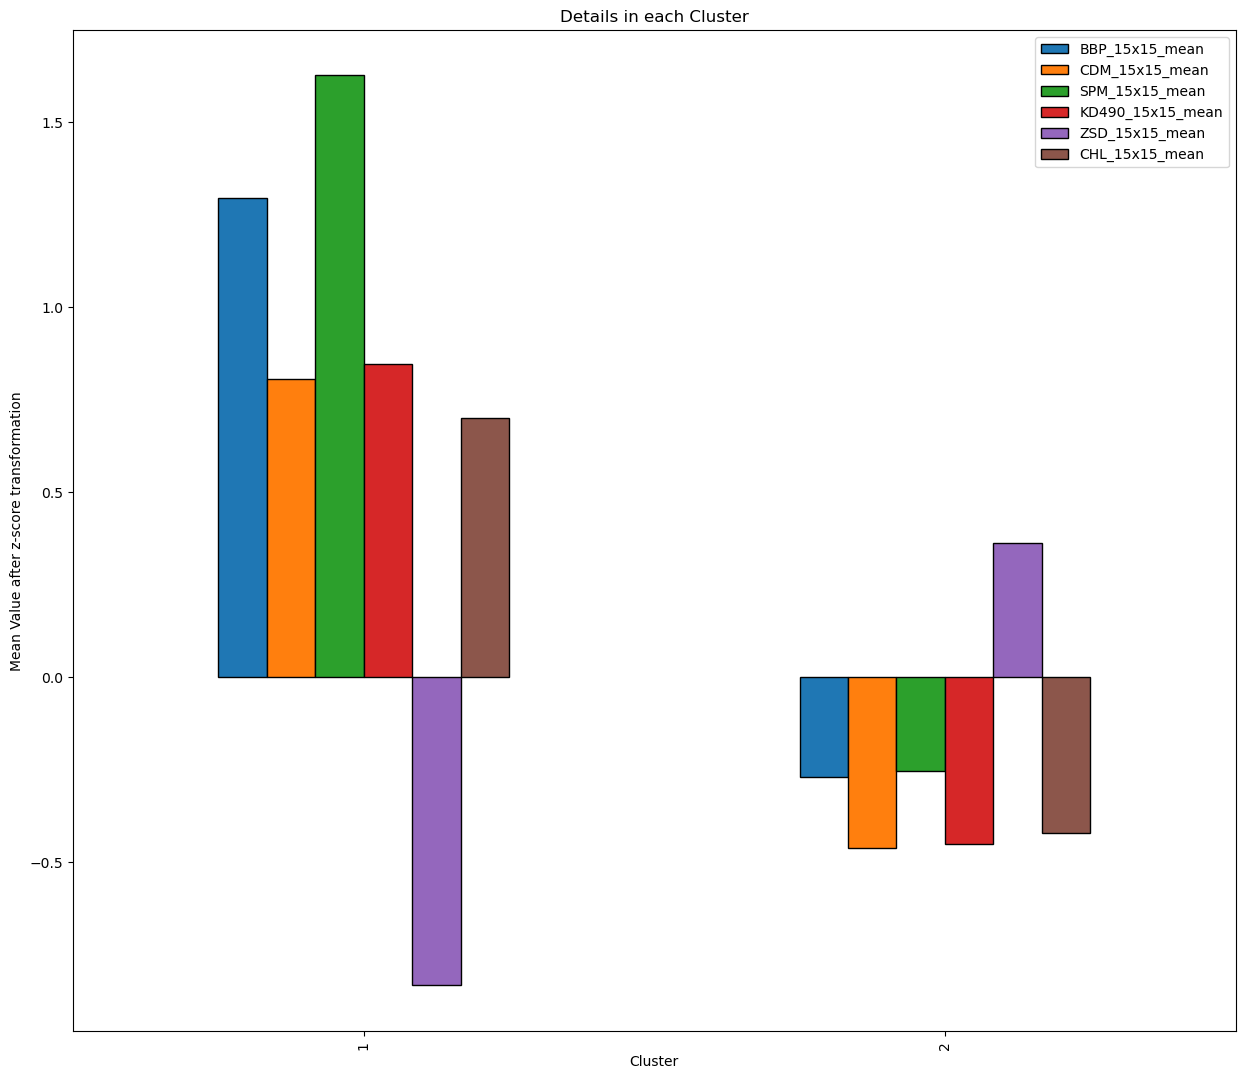

In [63]:
ax = means_cluster_scaled.plot(kind='bar', edgecolor="black", figsize=(15, 13), title='Cluster summary')
for p in ax.containers:
    for patch in p.patches:
        height = patch.get_height()
plt.legend()
plt.xlabel('Cluster')
plt.ylabel('Mean Value after z-score transformation')
plt.title('Details in each Cluster')
plt.savefig('results/Kmeans/K_cluster_detail.png')
plt.show()